# Task №1

**Introduction:**

Education plays a significant role in the success of venture capital-backed startups. Understanding the relationship between educational variables and the achievement of unicorn status (startups valued at least $1 billion) can provide valuable insights for investors and entrepreneurs. In this analysis, we explore a unique dataset that focuses on the educational backgrounds of founders associated with unicorn companies.

**Objective:**

The primary objective of this analysis is to examine the impact of education-based variables on the success of venture capital-backed startups. Specifically, we aim to identify any unusual or nonsensical observations in the data and explore the concept of university homophily among unicorn founders.

**Data Description:**

The dataset comprises two main tables: Table 1 contains information on founder education, while Table 2 provides details about unicorn companies and the number of founders associated with each company. In Table 1, the unit of observation is the pair (founder, degree), meaning that each founder's educational achievements are represented as individual entries. For instance, if a founder holds a bachelor's degree from NES, a master's degree from NES, and a PhD from Stanford, there would be three separate entries for each diploma.

**Analytical Tasks:**

Unusual Observations: We will carefully analyze the data for any observations or outcomes that deviate from common sense or contain mistakes. Data validation checks will be performed, including duplicate entry detection, university name validation, and degree verification.

HomophilyFounder Dummy Variable: We will generate a dummy variable, "HomophilyFounder," for each unicorn company in Table 2. This variable will indicate whether at least two founders of a unicorn company studied at the same university. We will calculate the percentage of unicorns exhibiting university homophily for different groups of companies based on the number of founders (e.g., companies with 2 founders, 3 founders, and so on).

**Additional Research Questions:**

In addition to the primary analysis, we can explore further questions using this dataset. 

By addressing additional research questions, we can gain valuable insights into the role of education in the success of venture capital-backed startups and uncover patterns that contribute to the formation of unicorn companies.

## Data loading and preprocessing

In [1]:
#импорт библиотек
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import datetime
import math as mth
import seaborn as sns

In [2]:
table_1 = pd.read_csv(r"/Users/michalboratynski/Desktop/table_1.csv")

table_1.head()

,UniqueCompanyID,YearFoundedCompany,UFounderDummy,RSFounderDummy,UniquePersonID,University,Duration,StartUniversity,EndUniversity,SuitableUniversity,Type,OrganisationType,CleanUniversity
0,1176,1975.0,1,0,14148,Purdue University,? - 1968,?,1968,1,Study,University,Purdue University
1,1176,1975.0,1,0,12426,Boston College,?,?,?,1,Study,University,Boston College
2,1176,1975.0,1,0,14148,Oklahoma Christian University,? - 2013,?,2013,0,Study,University,Oklahoma Christian University
3,1176,1975.0,1,0,14148,Oklahoma Christian University,? - 1966,?,1966,1,Study,University,Oklahoma Christian University
4,439,1982.0,1,0,10447,University of Florida,1976 - 1980,1976,1980,1,Study,University,University of Florida


In [3]:
var_def = pd.read_csv(r"/Users/michalboratynski/Desktop/var_def.csv")

var_def.head()

,id,Tab,Variable,Definition,Type,Descriptive,FinalizedUnicorn,FinalizedRS,Update Frequency
0,1,Data,CompanyPBIDFounderName,CompanyPBID & Founder full name,Text,Ignore,Y,N,Static
1,2,Data,UFounderDummy,NaN,Dummy,Quantitative,Y,N,Static
2,3,Data,RSFounderDummy,NaN,Dummy,Quantitative,Y,N,Static
3,4,Data,UniquePersonID,founder's unique person identification number,ID,Ignore,Y,N,Static
4,5,Data,FounderNameLI,Name of founder from LinkedIn,Text,Ignore,Y,N,Static


In [4]:
table_2 = pd.read_csv(r"/Users/michalboratynski/Desktop/table_2.csv")

table_2.head()

,UniqueCompanyID,UnicornDummy,AllFounders
0,492,1,1
1,586,1,2
2,521,1,1
3,517,1,1
4,570,1,8


In [5]:
var_def_2 = pd.read_csv(r"/Users/michalboratynski/Desktop/var_def_2.csv")
    
pd.set_option('display.max_columns', None)  # show all columns
pd.set_option('display.max_colwidth', None)  # show full text width


var_def_2.head()

,id,Tab,Variable,Definition,Type,Descriptive,Finalized,Update Frequency
0,NaN,Data,UniqueCompanyID,Numerical id of each company in the sample,ID,Ignore,Y,Static
1,NaN,Data,Company,Legal name of company,Text,Ignore,Y,Static
2,NaN,Data,UDummy,"Whether the company is in Unicorn sample (1: Unicorn, 0: RS)",Dummy,Quantitative,Y,Static


In [6]:
var_def_2 = pd.read_csv(r"/Users/michalboratynski/Desktop/var_def_2.csv")

var_def_2.head()

,id,Tab,Variable,Definition,Type,Descriptive,Finalized,Update Frequency
0,NaN,Data,UniqueCompanyID,Numerical id of each company in the sample,ID,Ignore,Y,Static
1,NaN,Data,Company,Legal name of company,Text,Ignore,Y,Static
2,NaN,Data,UDummy,"Whether the company is in Unicorn sample (1: Unicorn, 0: RS)",Dummy,Quantitative,Y,Static


In [7]:
table_3 = pd.read_csv(r"/Users/michalboratynski/Desktop/table_3.csv")

table_3.head(10)

,CleanUniversity,UnicornFounders,Total,Per1000
0,Stanford University,109,121744,0.90
1,MIT,59,78418,0.75
2,Harvard University,66,162297,0.41
3,Carnegie Mellon University,15,63179,0.24
4,University of Pennsylvania,24,129671,0.19
5,"University of California, Berkeley",21,125162,0.17
6,Yale University,13,78678,0.17
7,Dartmouth College,3,21381,0.14
8,Brown University,3,27014,0.11
9,Tel Aviv University,13,0,#DIV/0!


In [8]:
table_1.info()
var_def.info()
table_2.info()
var_def_2.info()
table_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9939 entries, 0 to 9938
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UniqueCompanyID     9939 non-null   int64  
 1   YearFoundedCompany  9934 non-null   float64
 2   UFounderDummy       9939 non-null   int64  
 3   RSFounderDummy      9939 non-null   int64  
 4   UniquePersonID      9939 non-null   int64  
 5   University          9939 non-null   object 
 6   Duration            8758 non-null   object 
 7   StartUniversity     8258 non-null   object 
 8   EndUniversity       8302 non-null   object 
 9   SuitableUniversity  9939 non-null   int64  
 10  Type                9939 non-null   object 
 11  OrganisationType    9939 non-null   object 
 12  CleanUniversity     9388 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1009.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 c

The data has been successfully loaded. Some columns have incorrect data types, let's change that and start with table_1.

In [9]:
table_1.dropna(subset=['YearFoundedCompany'], inplace=True)
table_1['YearFoundedCompany']=table_1['YearFoundedCompany'].astype(int)

We have removed the missing values in the year column and changed the data type to integers. Additionally, there are many missing values in this table, especially in the start and end date columns. We will not delete them as it would result in a significant loss of data, and these columns are not the most crucial ones.

In the **var_dev** table, the data types are correct, and there are missing values. We will not make any changes to it as it is a reference dataset.

In **table_2**, everything is correct.

In the **var_def_2** table, all the data types are correct. We can delete the column with IDs that only contain missing values.

In [10]:
var_def_2 = var_def_2.drop('id', axis=1)


In **table_3**, there are no missing values, but there are incorrect data types. Let's change that.

In [11]:
table_3['Per1000'] = pd.to_numeric(table_3['Per1000'], errors='coerce')

table_3['Per1000'] = table_3['Per1000'].astype(float)

table_3.head(10)

,CleanUniversity,UnicornFounders,Total,Per1000
0,Stanford University,109,121744,0.90
1,MIT,59,78418,0.75
2,Harvard University,66,162297,0.41
3,Carnegie Mellon University,15,63179,0.24
4,University of Pennsylvania,24,129671,0.19
5,"University of California, Berkeley",21,125162,0.17
6,Yale University,13,78678,0.17
7,Dartmouth College,3,21381,0.14
8,Brown University,3,27014,0.11
9,Tel Aviv University,13,0,NaN


We have changed the data type to float. However, missing values have been introduced, specifically in the rows where the Total is indicated as 0. Unfortunately, we won't be able to fill in these missing values with the mean or median. We will leave them as they are. Let's check how many missing values there are.

In [12]:
table_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CleanUniversity  265 non-null    object 
 1   UnicornFounders  265 non-null    int64  
 2   Total            265 non-null    int64  
 3   Per1000          34 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 8.4+ KB


It turns out that there are a lot of omissions in this dataset. A total of 34 values in columns Total and Per1000.

Let's check for obvious duplicates.

In [13]:
table_1.duplicated().sum()

240

In [14]:
table_2.duplicated().sum()

0

In [15]:
table_3.duplicated().sum()

0

240 duplicates in table 1

In [16]:
table_1.drop_duplicates(keep='first', inplace=True)

In [17]:
table_1.duplicated().sum()

0

The data has been studied, we can proceed to the analysis.

## Education data analysis

###  Observations / outcomes that are unusual / do not make common sense?

1. One of the errors will be described in more detail in the next subsection. Let's elaborate on it further:

In the dataset, we observe inconsistencies and errors. Firstly, there is a company with 0 founders, which indicates missing or incorrect data. It is unusual to have information about a person's education without any associated founder or company.

Secondly, we encounter cases where companies with only 1 founder are mistakenly categorized as having two different founders who studied at the same university. This discrepancy suggests data entry or categorization errors, as it is unlikely for a single founder to simultaneously be associated with two different individuals who attended the same university.

These errors indicate the presence of data quality issues and highlight the need for further data validation and cleaning to ensure the accuracy and reliability of the analysis.

2. I also described various issues with the data, such as missing values or data type inconsistencies.

3. There are also variables that are not explained, and in the explanations, there are variables that are not present in the dataset.

4. In the "OrganisationType" column, there are two variations of the value "University": one with a space at the end and one without a space. Additionally, there is only one entry with the "Hospital" status.

5. In the "Type" column, there are two variations of the value "Work": one with a space at the end and one without a space.

###  What % of unicorns have at least 2 founders who studied at the same university. 

Merge the tables.

In [18]:
df = pd.merge(table_1, table_2, on='UniqueCompanyID')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5584 entries, 0 to 5583
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   UniqueCompanyID     5584 non-null   int64 
 1   YearFoundedCompany  5584 non-null   int64 
 2   UFounderDummy       5584 non-null   int64 
 3   RSFounderDummy      5584 non-null   int64 
 4   UniquePersonID      5584 non-null   int64 
 5   University          5584 non-null   object
 6   Duration            5553 non-null   object
 7   StartUniversity     5538 non-null   object
 8   EndUniversity       5538 non-null   object
 9   SuitableUniversity  5584 non-null   int64 
 10  Type                5584 non-null   object
 11  OrganisationType    5584 non-null   object
 12  CleanUniversity     5566 non-null   object
 13  UnicornDummy        5584 non-null   int64 
 14  AllFounders         5584 non-null   int64 
dtypes: int64(8), object(7)
memory usage: 698.0+ KB


There are 5584 companies remaining.

Create a new variable

In [19]:
grouped_data = df.groupby(['UniqueCompanyID', 'University'])['UniquePersonID'].nunique()
homophily_data = grouped_data[grouped_data > 1].reset_index()['UniqueCompanyID']
df['HomophilyFounder'] = df['UniqueCompanyID'].isin(homophily_data).astype(int)

Verify if the variable is working correctly

In [20]:
filtered_table = df[df['UniqueCompanyID'] == 15]
filtered_table


,UniqueCompanyID,YearFoundedCompany,UFounderDummy,RSFounderDummy,UniquePersonID,University,Duration,StartUniversity,EndUniversity,SuitableUniversity,Type,OrganisationType,CleanUniversity,UnicornDummy,AllFounders,HomophilyFounder
1492,15,2008,1,0,13604,Boston Latin Academy,1994 - 2001,1994,2001,1,Study,High School,??,1,3,1
1493,15,2008,1,0,12396,MIT,?,?,?,0,Study,University,MIT,1,3,1
1494,15,2008,1,0,13604,Harvard University,2001 - 2005,2001,2005,1,Study,University,Harvard University,1,3,1
1495,15,2008,1,0,12396,Brown University,?,?,?,0,Study,University,Brown University,1,3,1
1496,15,2008,1,0,12396,Rhode Island School of Design,2000 – 2005,2000,2005,1,Study,University,Rhode Island School of Design,1,3,1
1497,15,2008,1,0,10690,Rhode Island School of Design,1999 - 2004,1999,2004,1,Study,University,Rhode Island School of Design,1,3,1


Everything is working properly. 
Let's group the data.

In [21]:
# grouping the data by AllFounders and calculating the desired values
grouped_df = df.groupby('AllFounders').agg({'HomophilyFounder': [('Count', 'count'),
                                                                 ('Count_Homophily_1', lambda x: (x == 1).sum())]}).reset_index()

# renaming the columns
grouped_df.columns = ['AllFounders', 'Count', 'Count_Homophily_1']



As we can see, there are errors in the data.
There is a company with 0 founders, but there is information about a person who has studied somewhere.
We also have companies with 1 founder, but they have been categorized as having two different founders who studied at the same university.

In [22]:
filtered_table = df[(df['AllFounders'] == 1) & (df['HomophilyFounder'] == 1)]
filtered_table.head()

,UniqueCompanyID,YearFoundedCompany,UFounderDummy,RSFounderDummy,UniquePersonID,University,Duration,StartUniversity,EndUniversity,SuitableUniversity,Type,OrganisationType,CleanUniversity,UnicornDummy,AllFounders,HomophilyFounder
2831,324,2012,1,0,15277,The Hebrew University of Jerusalem,2005 -2007,2005,2007,1,Study,University,The Hebrew University,1,1,1
2832,324,2012,1,0,15277,The Hebrew University of Jerusalem,2002 -2005,2002,2005,1,Study,University,The Hebrew University,1,1,1
2833,324,2012,1,0,15287,The Hebrew University of Jerusalem,2005 - 2006,2005,2006,0,Study,University,The Hebrew University,1,1,1
2834,324,2012,1,0,15287,The Hebrew University of Jerusalem,2003 - 2005,2003,2005,0,Study,University,The Hebrew University,1,1,1
2835,324,2012,1,0,12982,"The Academic College of Tel-Aviv, Yaffo",2001 - 2004,2001,2004,1,Study,University,"The Academic College of Tel-Aviv, Yaffo",1,1,1


There is likely an error in the number of founders here.
Calculate the proportion.

In [23]:
grouped_df['share'] = round(grouped_df['Count_Homophily_1']/grouped_df['Count']*100, 2)
grouped_df = grouped_df[~grouped_df['AllFounders'].isin([0, 1])]
grouped_df = grouped_df.sort_values('share', ascending=False)
grouped_df.reset_index(drop=True, inplace=True)
grouped_df

,AllFounders,Count,Count_Homophily_1,share
0,12,21,21,100.00
1,5,587,389,66.27
2,4,1150,621,54.00
3,7,132,69,52.27
4,6,182,91,50.00
5,3,1642,641,39.04
6,2,1464,369,25.20
7,8,47,10,21.28
8,9,29,0,0.00


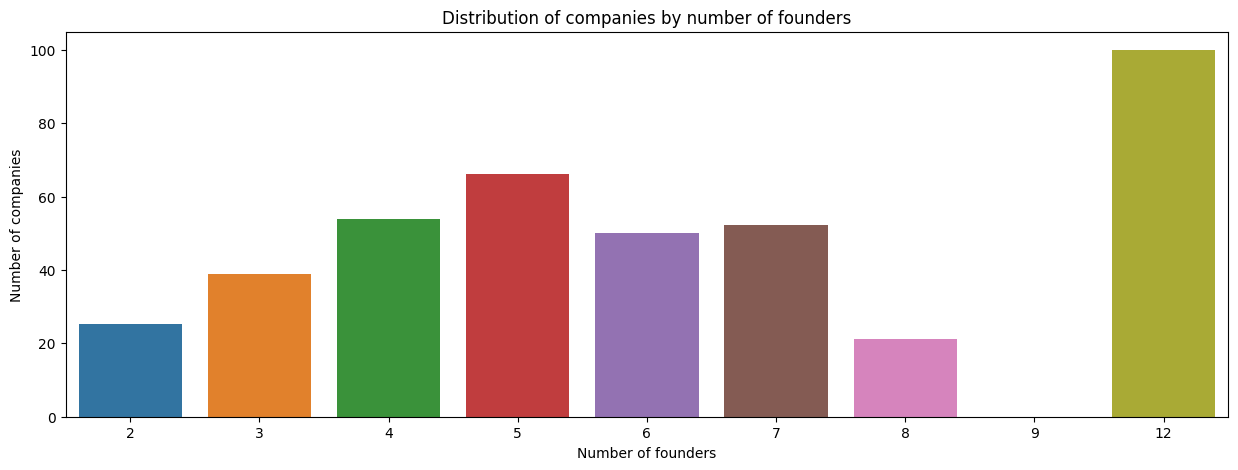

In [24]:
plt.figure(figsize=(15,5))
sns.barplot(x=grouped_df['AllFounders'],y=grouped_df['share'])
plt.title("Distribution of companies by number of founders")
plt.xlabel("Number of founders")
plt.ylabel("Number of companies");

**Conclusion**

As we can see from the graphs, the majority of companies have 2-5 founders.
When looking at the number of companies where founders studied at the same university, we observe the following:
1. The highest share of unicorns with university homophily is among companies with 12 founders, but we have limited data to draw strong conclusions.
2. Companies with 5, 4, 6, and 7 founders show a higher propensity for university homophily (over 50%).
3. Companies with 3 and 2 founders exhibit lower occurrences of university homophily, which is logical as fewer founders reduce the likelihood of studying at the same university.
4. Companies with 8 and 9 founders are less inclined towards university homophily, but due to limited data points, we cannot draw strong conclusions for this group.

### Number of companies by the number of founders

In [25]:
amount_of_founders = table_2.pivot_table(index='AllFounders', values='UniqueCompanyID', aggfunc='count')\
                            .sort_values(by='UniqueCompanyID', ascending=False)
display(amount_of_founders)

,UniqueCompanyID
AllFounders,
2,389
3,296
1,176
4,155
5,57
6,19
7,10
8,4
9,2


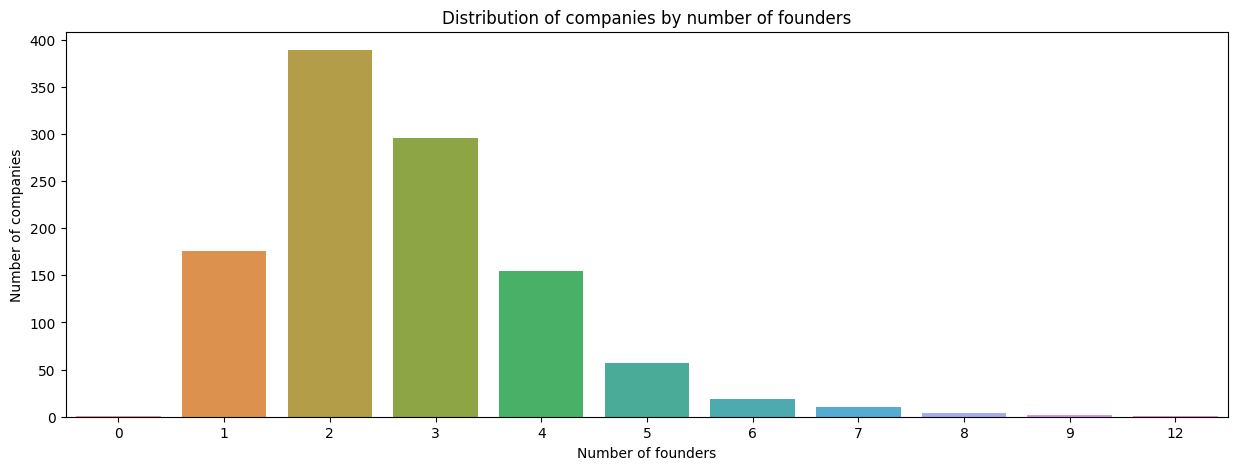

In [26]:
plt.figure(figsize=(15,5))
sns.barplot(x=amount_of_founders.index,y=amount_of_founders['UniqueCompanyID'])
plt.title("Distribution of companies by number of founders")
plt.xlabel("Number of founders")
plt.ylabel("Number of companies");

Most commonly, companies have 1-3 founders. Less frequently, there are 8-12 founders. These companies are truly "unicorns" as there are very few of them.

### The most popular universities among the founders of unicorn companies

Let's see in which universities the founders of unicorn companies are currently studying. We will examine it based on the unique founder IDs.

In [27]:
amount_of_universities = table_1.pivot_table(index='University', values='UniquePersonID', aggfunc='nunique')\
                            .sort_values(by='UniquePersonID', ascending=False)
display(amount_of_universities)

,UniquePersonID
University,
Stanford University,377
Massachusetts Institute of Technology,210
"University of California, Berkeley",160
Harvard University,159
Harvard Business School,142
...,...
Lewis & Clark College,1
Lewis and Clark College,1
Lewisville,1


Let's display the top 10 universities where the founders of unicorn companies are currently studying based on the unique founder IDs.

In [28]:
amount_of_universities = amount_of_universities.head(10)

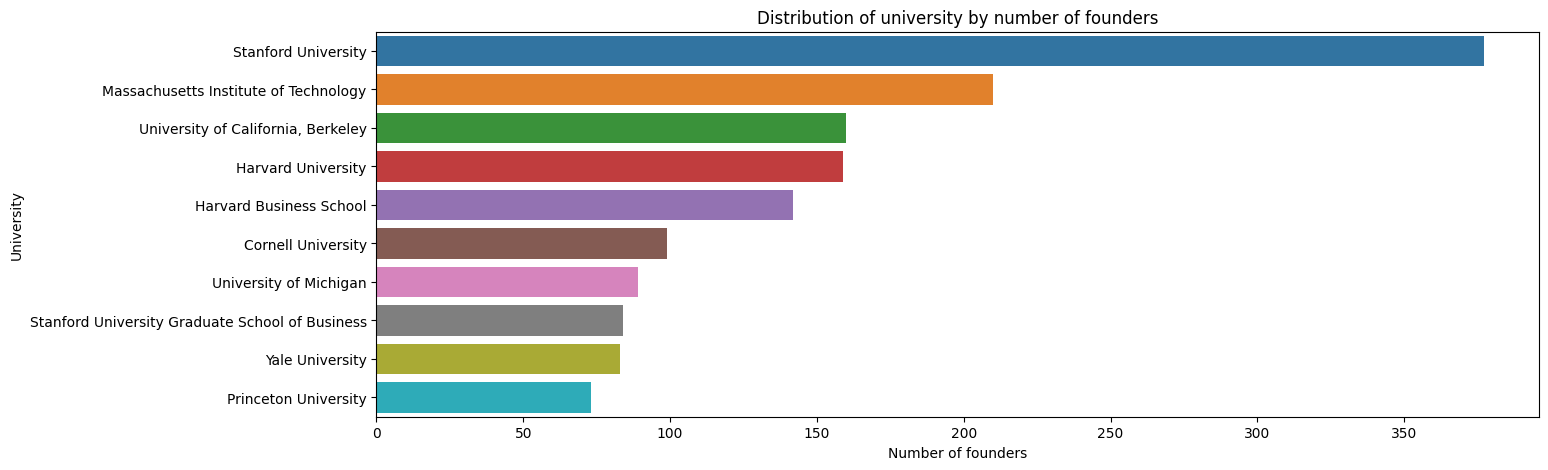

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(y=amount_of_universities.index,x=amount_of_universities['UniquePersonID'])
plt.title("Distribution of university by number of founders")
plt.xlabel("Number of founders")
plt.ylabel("University");

The most common universities attended by founders of unicorn companies are:
 - Stanford University, 
 - Massachusetts Institute of Technology (MIT), 
 - University of California, Berkeley, 
 - Harvard University,
 - Harvard Business School.

### The share of unicorn founders in each university.

Let's compare the data with another dataset on the share of unicorn founders in each university.

In [30]:
sorted_table_3 = table_3.sort_values(by='Per1000', ascending=False)
sorted_table_3

,CleanUniversity,UnicornFounders,Total,Per1000
0,Stanford University,109,121744,0.90
1,MIT,59,78418,0.75
2,Harvard University,66,162297,0.41
3,Carnegie Mellon University,15,63179,0.24
4,University of Pennsylvania,24,129671,0.19
...,...,...,...,...
260,Leiden University,1,0,NaN
261,Montana State University,1,0,NaN
262,Nanjing University,1,0,NaN
263,National Technological University,1,0,NaN


The first two universities matched our results, but the rest are different. The top 5 in this dataset are:

- Stanford University
- MIT
- Harvard University
- Carnegie Mellon University
- University of Pennsylvania

### The number of educational degrees obtained by founders of unicorn companies

In [31]:
amount_of_degrees = table_1.pivot_table(index='UniquePersonID', values='University', aggfunc='count')\
                            .sort_values(by='University', ascending=False)
display(amount_of_degrees)

,University
UniquePersonID,
14567,13
14540,12
14022,9
12838,9
10734,8
...,...
13925,1
11218,1
12077,1


In [32]:
grouped_by_university = amount_of_degrees.groupby('University').size().reset_index(name='Count')
grouped_by_university


,University,Count
0,1,1730
1,2,1779
2,3,812
3,4,301
4,5,85
5,6,22
6,7,18
7,8,5
8,9,2
9,12,1


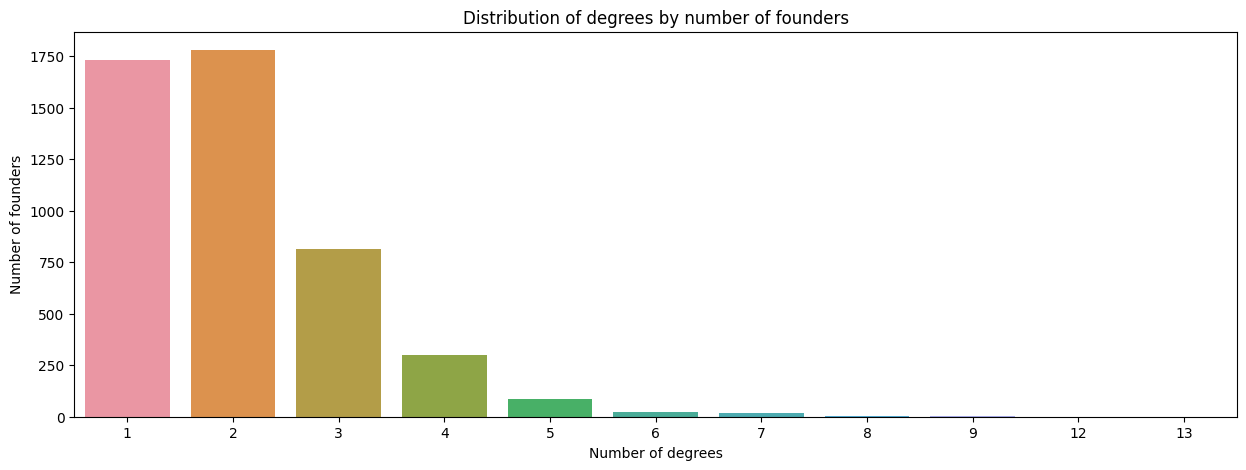

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(x=grouped_by_university['University'],y=grouped_by_university['Count'])
plt.title("Distribution of degrees by number of founders")
plt.xlabel("Number of degrees")
plt.ylabel("Number of founders");

As we can see, founders most commonly have 2 degrees, followed by 1 degree and then 3 degrees. Interestingly, there are unique individuals who have obtained 11-13 degrees throughout their academic journey.

### Conclusion

In summary, the analysis of the dataset reveals interesting patterns in the education background of unicorn company founders. The majority of companies have 2-5 founders, and there is a notable presence of university homophily among companies with 5, 4, 6, and 7 founders. However, companies with 3 and 2 founders exhibit lower occurrences of university homophily, which aligns with the expectation of fewer shared educational experiences. Additionally, companies with 8 and 9 founders show less inclination towards university homophily, but the limited data points prevent drawing definitive conclusions for this group.

The most commonly attended universities by founders of unicorn companies include Stanford University, MIT, UC Berkeley, Harvard University, and Harvard Business School. However, when compared to another dataset, there are slight variations in the rankings, with universities like Carnegie Mellon University and the University of Pennsylvania also appearing in the top 5.

The analysis also highlights the diversity in the number of degrees obtained by founders, with 2 degrees being the most common, followed by 1 degree and then 3 degrees. It is worth noting the presence of unique individuals who have obtained an unusually high number of degrees, ranging from 11 to 13.

These findings shed light on the educational backgrounds of unicorn company founders and provide insights into the prevalence of university homophily and the distribution of degree counts. Such information can be valuable for understanding the dynamics of successful entrepreneurial ventures and the role of education in their formation.

### Additional Research Questions:

In addition to the primary analysis, we can explore further questions using this dataset. Here are three potential research questions:

Does the educational diversity of unicorn founders impact the company's long-term success? To investigate this, we can collect data on financial performance metrics, such as revenue growth, profitability, and market share, and analyze their relationship with the educational backgrounds of founders.

Are certain universities more likely to produce unicorn founders? To explore this, we can gather data on the educational institutions attended by successful entrepreneurs outside the unicorn realm and compare it with the data on unicorn founders' educational backgrounds.

How does the educational composition of unicorn founding teams evolve over time? By collecting data on the founding years of unicorn companies and the educational backgrounds of their founders, we can examine any trends or shifts in the educational diversity of unicorn teams.

# Task №2

The task involves conducting an analysis to identify undergraduate programs in the US that have produced a higher number of unicorn founders. The analysis involves calculating the ratio of unicorn founders who entered graduate programs at specific universities between 1995 and 2019 to the total number of students entering these programs, expressed per 1,000 students. The data for this analysis is provided in Table 3.

The objective is to write a draft post based on the findings from this analysis. The post will focus on highlighting the undergraduate programs that have had a significant impact on the creation of unicorn companies. 

In addition, a designer has proposed a visualization for the findings. The task is to provide feedback on the visualization and suggest ways to enhance its impact, visual appeal, and clarity.

In [34]:
sorted_table_3 = table_3.sort_values(by='Per1000', ascending=False)
sorted_table_3.head(15)

,CleanUniversity,UnicornFounders,Total,Per1000
0,Stanford University,109,121744,0.90
1,MIT,59,78418,0.75
2,Harvard University,66,162297,0.41
3,Carnegie Mellon University,15,63179,0.24
4,University of Pennsylvania,24,129671,0.19
5,"University of California, Berkeley",21,125162,0.17
6,Yale University,13,78678,0.17
7,Dartmouth College,3,21381,0.14
10,University of Chicago,12,112049,0.11
8,Brown University,3,27014,0.11


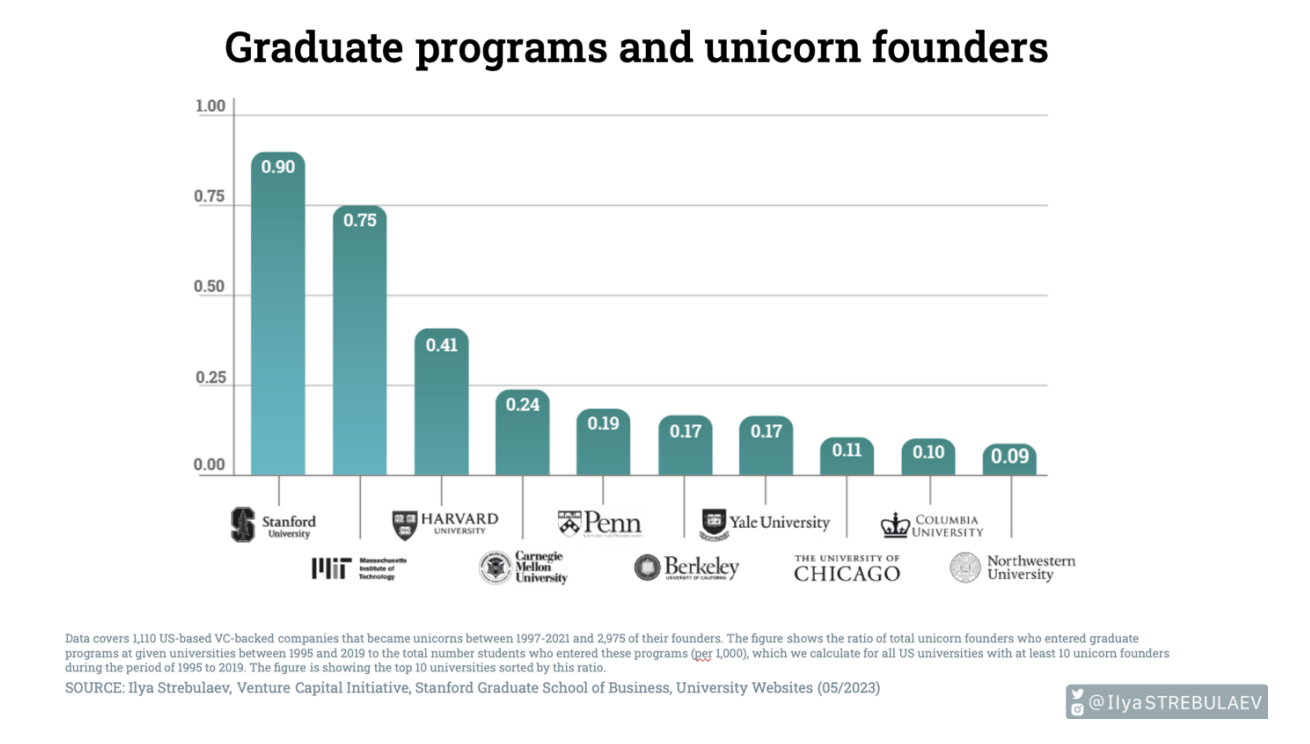

**Which undergraduate programs in the US have produced a higher number of unicorn founders?**

We conducted an analysis to identify the impact of undergraduate programs on the creation of unicorn companies. 

Among the 2,975 founders of 1,110 US-based VC-backed companies that became unicorns between 1997 and 2021, we examined their educational backgrounds and calculated the ratio of unicorn founders who entered graduate programs at specific universities between 1995 and 2019 to the total number of students entering these programs (per 1,000 students). 

The three most prestigious universities that founders attended are Stanford University, Massachusetts Institute of Technology (MIT), and Harvard University, with respective proportions of 0.90, 0.75, and 0.41. 

Following closely behind are Carnegie Mellon University, University of Pennsylvania, and University of California, Berkeley, which boast proportions of 0.24, 0.19, and 0.17 founders respectively.

These undergraduate programs have played a crucial role in fostering entrepreneurial talent and fueling the growth of unicorn companies. 

We extend our gratitude to the Venture Capital Initiative team at Stanford Graduate School of Business for conducting this insightful research and providing us with valuable data. 

Stay tuned for more posts on the impact of education and innovation in the startup ecosystem! 

#unicornfounders #entrepreneurship #startuplife #educationmatters #innovation #stanfordgsb #mit #harvarduniversity #carnegiemellonuniversity #upenn #ucberkeley #yaleuniversity #uchicago #columbiauniversity #northwesternuniversity"




**In my opinion, the graph looks very user-friendly:**

It includes the logo of each university for better visual identification.
The color scheme is pleasing, but a more noticeable gradient could be added (with 0.90 being the darkest and 0.09 being the lightest).
The title is clear and easy to understand.
Overall, everything looks good, except for the discrepancies in the data compared to Table 3.